<a href="https://colab.research.google.com/github/meliy-meyada/Tensorflow-Deep-Learning-and-Artificial-Intelligence/blob/main/TF2_0_LSTM_Nonlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Tensorflow
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
# Additional imports

from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Make the original data

series = np.sin((0.1*np.arange(400))**2)

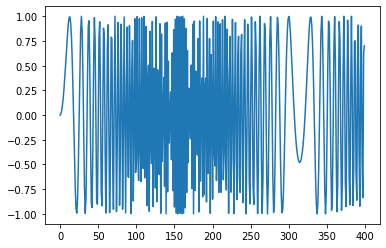

In [4]:
# Plot it

plt.plot(series)
plt.show()

In [5]:
# Build the dataset

T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T) # Make it N x T
Y = np.array(Y)
N = len(X)
print("X.shape ", X.shape, "Y.shape ", Y.shape)

X.shape  (390, 10) Y.shape  (390,)


In [6]:
# Try autoregressive linear model

i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.01),
)

# Train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)



Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 3s 29ms/step - loss: 1.2279 - val_loss: 0.9708
Epoch 2/80
7/7 [==============================] - 0s 8ms/step - loss: 1.0659 - val_loss: 0.8949
Epoch 3/80
7/7 [==============================] - 0s 8ms/step - loss: 0.9516 - val_loss: 0.8343
Epoch 4/80
7/7 [==============================] - 0s 7ms/step - loss: 0.8471 - val_loss: 0.7765
Epoch 5/80
7/7 [==============================] - 0s 8ms/step - loss: 0.7594 - val_loss: 0.7216
Epoch 6/80
7/7 [==============================] - 0s 7ms/step - loss: 0.6940 - val_loss: 0.6890
Epoch 7/80
7/7 [==============================] - 0s 7ms/step - loss: 0.6432 - val_loss: 0.6586
Epoch 8/80
7/7 [==============================] - 0s 7ms/step - loss: 0.6066 - val_loss: 0.6466
Epoch 9/80
7/7 [==============================] - 0s 8ms/step - loss: 0.5754 - val_loss: 0.6315
Epoch 10/80
7/7 [==============================] - 0s 7ms/step - loss: 0.5544 - val_loss: 0.6157
Epoch 11/80
7/7 [==============================] 

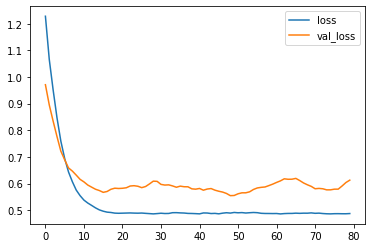

In [7]:
# Plot loss per iteration

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(390, 1)


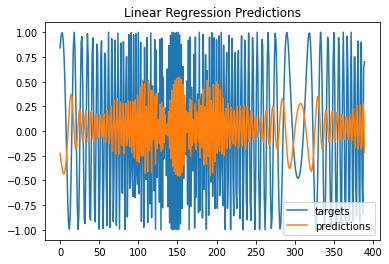

In [8]:
# One-step forecast using true target

outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

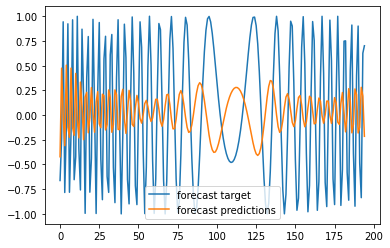

In [9]:
# One-step forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# Index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
  i += 1

  # Update the predictions list
  validation_predictions.append(p)

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast predictions')
plt.legend()

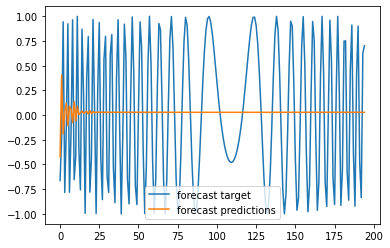

In [11]:
# Multi-step forecast 

validation_target = Y[-N//2:]
validation_predictions = []

# Last train input
last_x = X[-N//2] # 1-D array of lenght T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar

  # Update the predictions list
  validation_predictions.append(p)

  # Make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast predictions')
plt.legend()

In [16]:
# RNN/LSTM model
X = X.reshape(-1, T, 1) # Make it N x T x D

# Make the RNN
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.05),
)

# Train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size=32,
    epochs=200,
    validation_data=(X[-N//2:], Y[-N//2:]), 
)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 5s 88ms/step - loss: 0.5107 - val_loss: 0.6149
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 0.4932 - val_loss: 0.6662
Epoch 3/200
7/7 [==============================] - 0s 10ms/step - loss: 0.5567 - val_loss: 0.5330
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 0.5202 - val_loss: 0.5618
Epoch 5/200
7/7 [==============================] - 0s 10ms/step - loss: 0.4464 - val_loss: 0.5929
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 0.4432 - val_loss: 0.5255
Epoch 7/200
7/7 [==============================] - 0s 10ms/step - loss: 0.3435 - val_loss: 0.4490
Epoch 8/200
7/7 [==============================] - 0s 11ms/step - loss: 0.2494 - val_loss: 0.2331
Epoch 9/200
7/7 [==============================] - 0s 10ms/step - loss: 0.2209 - val_loss: 0.2100
Epoch 10/200
7/7 [==============================] - 0s 10ms/step - loss: 0.1721 - val_loss: 0.2778
Epoch 11/200
7/7 [=============

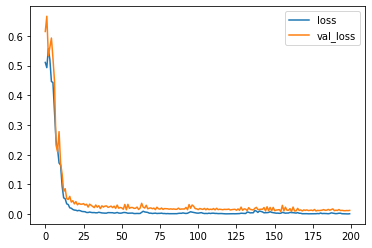

In [17]:
# Plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

(390, 1)


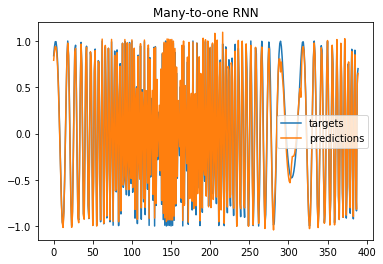

In [18]:
# One-step forecast using true targets

outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Many-to-one RNN")
plt.legend()
plt.show()

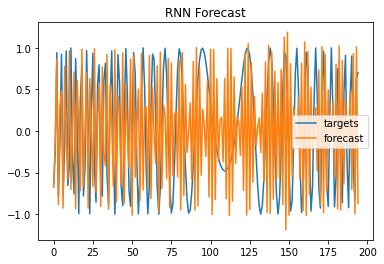

In [19]:
# Multi-step forecast 

forecast = []
input_ = X[-N//2]

while len(forecast) < len(Y[-N//2:]):
  # Reshape the input_ to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  # Make a new input with the lastest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()